In [17]:
# importing the required libraries
import pandas as pd
import numpy as np

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn import metrics

import matplotlib.pyplot as plt

### Dataset

In [18]:
dataset = pd.read_csv('dataset_arranged.csv')
print(dataset.head())

   SES  MMSE  eTIV   nWBV  CDR
0    2    27  1987  0.696  0.0
1    2    30  2004  0.681  0.0
2    0    23  1678  0.736  0.5
3    0    28  1738  0.713  0.5
4    0    22  1698  0.701  0.5


### Replacing empty data with the mean of each feature

In [19]:
replace_zero = ['SES','MMSE','eTIV','nWBV']

for column in replace_zero:
    dataset[column] = dataset[column].replace(0,np.nan)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.nan,mean)

### Splitting Dataset

In [20]:
x = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=11,test_size=0.2)

### Feature Scaling

In [21]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Encoding data from continuous to multiclass

In [22]:
lab_enc = LabelEncoder()

y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train_encoded))

print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test_encoded))

continuous
multiclass
continuous
multiclass


## Weighted K-Nearest Neighbor Model

## Euclidean distance

In [24]:
# knn
kval = range(1,14)

# We can create Python dictionary using [] or dict()
accuracy = []
precision =[]
recall =[]
f1 = []

# We use a loop through the range 1 to 14
# We append the scores in the dictionary
for i in kval:
    model = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean',weights='distance')

    model.fit(x_train, y_train_encoded)
    y_pred = model.predict(x_test)
    y_pred_df = pd.DataFrame(y_pred)
    
    accuracy.append(metrics.accuracy_score(y_test_encoded, y_pred_df))
    
    precision.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    recall.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    f1.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))

print('Accuracy values are\n ')
print(accuracy)

print('\nPrecision values are')
print(precision)

print('\nRecall values are')
print(recall)

print('\nF1 values are')
print(f1)

Accuracy values are
 
[0.8266666666666667, 0.8266666666666667, 0.8, 0.8133333333333334, 0.8133333333333334, 0.7866666666666666, 0.8133333333333334, 0.7866666666666666, 0.7866666666666666, 0.8, 0.8, 0.7866666666666666, 0.76]

Precision values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 0.7592592592592592, 0.7492330265439509, 0.7281045751633987]

Recall values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 0.7592592592592592, 0.7492330265439509, 0.7281045751633987]

F1 values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 

## Manhattan distance

In [25]:
#knn
kval = range(1,14)

# We can create Python dictionary using [] or dict()
accuracy2 = []
precision2 =[]
recall2 =[]
f1_score = []

# We use a loop through the range 1 to 14
# We append the scores in the dictionary
for i in kval:
    model = KNeighborsClassifier(n_neighbors=i,p=2,metric='manhattan',weights='distance')

    model.fit(x_train, y_train_encoded)
    y_pred = model.predict(x_test)
    y_pred_df = pd.DataFrame(y_pred)
    
    accuracy2.append(metrics.accuracy_score(y_test_encoded, y_pred_df))
    
    precision2.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    recall2.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    f1_score.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))

print('Accuracy values are\n ')
print(accuracy2)

print('\nPrecision values are')
print(precision2)

print('\nRecall values are')
print(recall2)

print('\nF1 values are')
print(f1_score)

Accuracy values are
 
[0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7866666666666666, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.8, 0.7733333333333333, 0.8, 0.7866666666666666, 0.7866666666666666, 0.8133333333333334]

Precision values are
[0.725108225108225, 0.725108225108225, 0.7370370370370369, 0.7370381556428067, 0.7417257683215129, 0.7282242717025326, 0.7282242717025326, 0.7691883372734436, 0.7435776201733648, 0.7762755102040817, 0.7666666666666666, 0.7590686274509805, 0.7856209150326796]

Recall values are
[0.725108225108225, 0.725108225108225, 0.7370370370370369, 0.7370381556428067, 0.7417257683215129, 0.7282242717025326, 0.7282242717025326, 0.7691883372734436, 0.7435776201733648, 0.7762755102040817, 0.7666666666666666, 0.7590686274509805, 0.7856209150326796]

F1 values are
[0.725108225108225, 0.725108225108225, 0.7370370370370369, 0.7370381556428067, 0.7417257683215129, 0.7282242717025326, 0.7282242717025326, 0.7691883372734436, 0.743577620173

## Minkowski distance

In [26]:
#knn
kval = range(1,14)

# We can create Python dictionary using [] or dict()
accuracy3 = []
precision3 =[]
recall3 =[]
f1_score3 = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for i in kval:
    model = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski',weights='distance')

    model.fit(x_train, y_train_encoded)
    y_pred = model.predict(x_test)
    y_pred_df = pd.DataFrame(y_pred)
    accuracy3.append(metrics.accuracy_score(y_test_encoded, y_pred_df))
    
    precision3.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    recall3.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))
    
    f1_score3.append(metrics.precision_score(y_test_encoded, y_pred_df, average='macro'))

print('accuracy values are\n ')
print(accuracy3)

print('\nPrecision values are')
print(precision3)

print('\nRecall values are')
print(recall3)

print('\nF1 values are')
print(f1_score3)

accuracy values are
 
[0.8266666666666667, 0.8266666666666667, 0.8, 0.8133333333333334, 0.8133333333333334, 0.7866666666666666, 0.8133333333333334, 0.7866666666666666, 0.7866666666666666, 0.8, 0.8, 0.7866666666666666, 0.76]

Precision values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 0.7592592592592592, 0.7492330265439509, 0.7281045751633987]

Recall values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 0.7592592592592592, 0.7492330265439509, 0.7281045751633987]

F1 values are
[0.7969696969696969, 0.7969696969696969, 0.7727272727272728, 0.7832142018188529, 0.793529791026662, 0.7543096872616323, 0.7856209150326796, 0.7590686274509805, 0.7666666666666666, 0.7762755102040817, 

## Visualizations

In [30]:
from matplotlib import style
style.use('ggplot')

## Acccuracy wrt increasing k values for three distance metrics

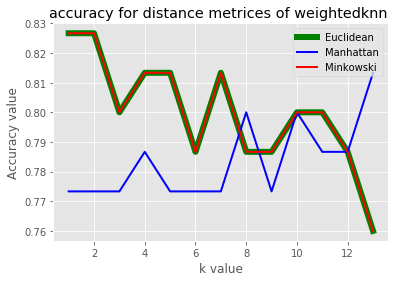

In [31]:
plt.plot(kval, accuracy,'g',label ='Euclidean',linewidth =6)
plt.plot(kval, accuracy2,'b',label='Manhattan',linewidth=2)
plt.plot(kval, accuracy3,'r',label='Minkowski',linewidth=2)
plt.title('Accuracy for distance metrices of weightedknn ')
plt.ylabel('Accuracy value')
plt.xlabel('k value')
plt.legend()

## Precision wrt increasing k values for three distance metrics

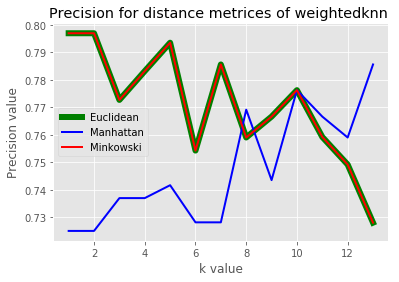

In [33]:
plt.plot(kval, precision,'g',label ='Euclidean',linewidth =6)
plt.plot(kval, precision2,'b',label='Manhattan',linewidth=2)
plt.plot(kval, precision3,'r',label='Minkowski',linewidth=2)
plt.title('Precision for distance metrices of weightedknn ')
plt.ylabel('Precision value')
plt.xlabel('k value')
plt.legend()

## Recall wrt increasing k values for three distance metrics

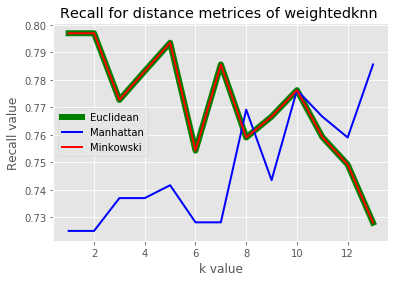

In [34]:
plt.plot(kval, recall,'g',label ='Euclidean',linewidth =6)
plt.plot(kval, recall2,'b',label='Manhattan',linewidth=2)
plt.plot(kval, recall3,'r',label='Minkowski',linewidth=2)
plt.title('Recall for distance metrices of weightedknn ')
plt.ylabel('Recall value')
plt.xlabel('k value')
plt.legend()

## F1 score wrt increasing k values for three distance metrics

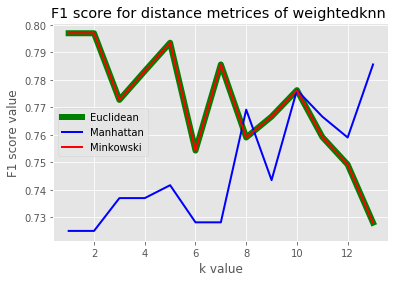

In [37]:
plt.plot(kval, f1,'g',label ='Euclidean',linewidth =6)
plt.plot(kval, f1_score,'b',label='Manhattan',linewidth=2)
plt.plot(kval, f1_score3,'r',label='Minkowski',linewidth=2)
plt.title('F1 score for distance metrices of weightedknn ')
plt.ylabel('F1 score value')
plt.xlabel('k value')
plt.legend()